In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import pickle
import swifter
import scipy.stats as sps
from sklearn.preprocessing import StandardScaler
pd.set_option('max_columns',None)

In [2]:
def_data = pd.read_pickle('../../FootballPlayerFootedness_copy/data/defender_clusters/defender_attrs_def_region_wise.pkl')

In [3]:
def_data.head()

,index,player_name,team,position,footedness,matches_played,passes,accpass,progaccpass,proginaccpass,...,vaep_acc_region_per_pass,prog_inacc_region_per_pass,vaep_inacc_region_per_pass,off_acc_region_per_pass,off_inacc_region_per_pass,def_acc_region_per_pass,def_inacc_region_per_pass,progpreference_per_region,progaccuracy_per_region,total_off_region_per_pass
0,0,AaronCresswell,West Ham,LB,left,7.0,275,203,43,47,...,"[4.351908341050148, 2.852484816685319, 11.1506...","[0, 4.26, 0, 0, 36.17, 38.3, 4.26, 17.02]","[0, -0.8253974374383688, 0, 0, -4.327049506280...","[3.6003405693918467, 5.269106011837721, 3.0451...","[0, 0.31970476265996695, 0, 0, -3.263597869697...","[0.7515675388276577, -2.416621195152402, 8.105...","[0, -1.1451022000983357, 0, 0, -1.063451554407...","[1.11, 3.33, 1.11, 1.11, 44.44, 30.0, 6.67, 12...","[100.0, 33.33, 100.0, 100.0, 57.5, 33.33, 66.6...","[3.6003405693918467, 1.9695051790525517, 3.045..."
1,1,AaronCresswell,West Ham,LCB,left,20.0,796,644,184,91,...,"[16.502801328897476, 0, 3.1730758491903543, 0,...","[2.2, 3.3, 0, 2.2, 37.36, 36.26, 10.99, 7.69]","[-0.38534030318260193, 1.5773851579676073, 0, ...","[2.848291303962469, 0, 1.703751739114523, 0, 5...","[-0.1581189571879804, -0.8412844811876615, 0, ...","[13.65451041298608, 0, 1.4693241100758314, 0, ...","[-0.22722140420228243, 2.418669561545054, 0, 0...","[1.82, 1.09, 0.36, 0.73, 56.73, 25.09, 9.09, 5...","[60.0, 0.0, 100.0, 0.0, 78.21, 52.17, 60.0, 50.0]","[1.6457271995022893, -0.8412844811876615, 1.70..."
2,2,AaronWanBissaka,Crystal Palace,RB,right,7.0,226,165,39,20,...,"[0, 26.790829375386238, 24.814365431666374, 4....","[5.0, 0, 0, 5.0, 5.0, 10.0, 15.0, 60.0]","[16.14953577518463, 0, 0, 26.300499215722084, ...","[0, 6.173175293952227, 7.698673754930496, 3.04...","[0.574472127482295, 0, 0, 1.9084271043539047, ...","[0, 20.6176545470953, 17.115691676735878, 1.67...","[15.575064346194267, 0, 0, 24.39207211136818, ...","[1.69, 1.69, 1.69, 3.39, 3.39, 6.78, 16.95, 64...","[0.0, 100.0, 100.0, 50.0, 50.0, 50.0, 70.0, 68...","[0.574472127482295, 6.173175293952227, 7.69867..."
3,3,AdamSmith,Bournemouth,LB,right,3.0,146,120,27,10,...,"[0, 0, 5.201917141675949, 0, 6.075569475069642...","[0, 0, 0, 0, 10.0, 50.0, 30.0, 10.0]","[0, 0, 0, 0, 5.831506103277206, -7.20428219065...","[0, 0, 5.2210502326488495, 0, 5.34815359860658...","[0, 0, 0, 0, 4.4114915654063225, -5.7543965987...","[0, 0, -0.01913309097290039, 0, 0.727415981236...","[0, 0, 0, 0, 1.4200147707015276, -1.4498856151...","[0.0, 0.0, 2.7, 0.0, 29.73, 27.03, 18.92, 21.62]","[0, 0, 100.0, 0, 90.91, 50.0, 57.14, 87.5]","[0, 0, 5.2210502326488495, 0, 5.26300250467929..."
4,4,AdamSmith,Bournemouth,RB,right,10.0,451,387,71,35,...,"[3.5457361955195665, 0, 0, 0, 10.6276816222816...","[0, 0, 0, 0, 2.86, 5.71, 31.43, 60.0]","[0, 0, 0, 0, -2.1765632554888725, 3.2613524235...","[1.786103704944253, 0, 0, 0, 4.087542742490768...","[0, 0, 0, 0, -6.332803517580032, 1.29774160450...","[1.7596324905753136, 0, 0, 0, 6.54013915918767...","[0, 0, 0, 0, 4.15624026209116, 1.9636107608675...","[1.89, 0.0, 0.0, 0.0, 5.66, 6.6, 28.3, 57.55]","[100.0, 0, 0, 0, 83.33, 71.43, 63.33, 65.57]","[1.786103704944253, 0, 0, 0, 2.350818365812301..."


In [4]:
cb_data = def_data.loc[def_data['position'].str.contains('CB')]

In [5]:
cb_data_progfil = cb_data.loc[cb_data['progaccpass'] + cb_data['proginaccpass'] >= 20]

In [6]:
len(cb_data_progfil)

172

In [7]:
cb_data_fil = cb_data_progfil[['player_name','team','position','footedness','matches_played','progaccpass','proginaccpass',
                              'accpassloc','inaccpassloc','progpreference_per_region','total_off_region_per_pass']]

In [8]:
cb_data_fil.reset_index(inplace = True)

In [9]:
def get_ind_regions(df):
    df1 = pd.DataFrame(df['progpreference_per_region'].tolist(), columns = ['def_LF_pref','def_LC_pref','def_RC_pref','def_RF_pref','att_LF_pref','att_LC_pref','att_RC_pref','att_RF_pref'])
    df2 = pd.DataFrame(df['total_off_region_per_pass'].tolist(), columns = ['def_LF_off','def_LC_off','def_RC_off','def_RF_off','att_LF_off','att_LC_off','att_RC_off','att_RF_off'])
    df = pd.concat([df,df1,df2], axis = 1)
    df.drop(['progpreference_per_region','total_off_region_per_pass'], axis = 1, inplace = True)
    return df

In [10]:
cb_data_cluster = get_ind_regions(cb_data_fil)

In [11]:
# Function to get x and y coordinates of pass locations
def getxy(locs):
    x = list()
    y = list()
    for p in locs:
        x.append(p[0])
        y.append(p[1])
    return x,y

In [12]:
# Function to get start and end location points for every row in df
def getstartend(locs):
    end_points = list()
    start_points = list()
    for point in locs:
            if point != []:
                end_points.append(point[1])
                start_points.append(point[0])
    return start_points,end_points

In [13]:
def est_dense_reg(a, b, p):
    df_kde = pd.DataFrame(columns=['x', 'y'])
    df_kde['x'] = a
    df_kde['y'] = b
    kde = sps.gaussian_kde(df_kde.values.T)
    xx, yy = np.meshgrid(
    np.linspace(0, 104, 500),
    np.linspace(0, 68, 500))
    z = kde.pdf([xx.ravel(), yy.ravel()]).reshape(xx.shape)
    zi = z > np.max(z) * (p/10)
    x1 = [min(xx[zi]), max(xx[zi])]
    y1 = [min(yy[zi]), max(yy[zi])]
    return x1, y1

In [14]:
cb_data_cluster['accpassloc'] = cb_data_cluster['accpassloc'].swifter.set_npartitions(8).apply(lambda x: getstartend(x))
cb_data_cluster['accpassloc'] = cb_data_cluster['accpassloc'].swifter.set_npartitions(8).apply(lambda x: x[0])
cb_data_cluster['inaccpassloc'] = cb_data_cluster['inaccpassloc'].swifter.set_npartitions(8).apply(lambda x: getstartend(x))
cb_data_cluster['inaccpassloc'] = cb_data_cluster['inaccpassloc'].swifter.set_npartitions(8).apply(lambda x: x[0])
cb_data_cluster['contour_bounds'] = cb_data_cluster['accpassloc']+cb_data_cluster['inaccpassloc']

In [15]:
cb_data_cluster['contour_bounds'] = cb_data_cluster['contour_bounds'].swifter.set_npartitions(8).apply(
    lambda x: est_dense_reg(getxy(x)[0],
                            getxy(x)[1], 6))

In [16]:
att_cols = [c for c in cb_data_cluster.columns if 'def' not in c]
print(att_cols)

['index', 'player_name', 'team', 'position', 'footedness', 'matches_played', 'progaccpass', 'proginaccpass', 'accpassloc', 'inaccpassloc', 'att_LF_pref', 'att_LC_pref', 'att_RC_pref', 'att_RF_pref', 'att_LF_off', 'att_LC_off', 'att_RC_off', 'att_RF_off', 'contour_bounds']


In [17]:
cb_data_cluster_att = cb_data_cluster[att_cols]

In [21]:
feature_cols = att_cols[3:]
print(feature_cols)

['position', 'footedness', 'matches_played', 'progaccpass', 'proginaccpass', 'accpassloc', 'inaccpassloc', 'att_LF_pref', 'att_LC_pref', 'att_RC_pref', 'att_RF_pref', 'att_LF_off', 'att_LC_off', 'att_RC_off', 'att_RF_off', 'contour_bounds']


In [19]:
cb_data_cluster_att.head()

,index,player_name,team,position,footedness,matches_played,progaccpass,proginaccpass,accpassloc,inaccpassloc,att_LF_pref,att_LC_pref,att_RC_pref,att_RF_pref,att_LF_off,att_LC_off,att_RC_off,att_RF_off,contour_bounds
0,1,AaronCresswell,West Ham,LCB,left,20.0,184,91,"[[27.04, 51.68], [65.52, 61.88], [61.36, 59.84...","[[62.4, 51.0], [79.04, 61.2], [15.6, 63.92], [...",56.73,25.09,9.09,5.09,4.098572,10.470576,19.408194,2.985546,"([25.010020040080157, 70.86172344689378], [48...."
1,7,AdrianMariappa,Watford,L_CB,right,5.0,29,17,"[[36.4, 45.56], [30.16, 46.24], [23.92, 34.68]...","[[43.68, 20.4], [27.04, 59.16], [74.88, 48.28]...",43.48,23.91,15.22,10.87,1.573852,3.925124,10.267141,3.539957,"([20.216432865731463, 39.80761523046092], [38...."
2,9,AdrianMariappa,Watford,RCB,right,11.0,71,26,"[[31.2, 10.2], [27.04, 9.52], [27.04, 15.64], ...","[[28.08, 9.52], [11.44, 10.2], [26.0, 29.24], ...",8.25,10.31,19.59,44.33,3.459880,13.321521,5.660290,3.638874,"([19.79959919839679, 45.64328657314629], [5.17..."
3,10,AdrianMariappa,Watford,R_CB,right,4.0,27,8,"[[30.16, 14.96], [38.48, 9.52], [24.96, 18.36]...","[[41.6, 2.04], [23.92, 11.56], [13.52, 24.48],...",8.57,25.71,17.14,28.57,4.365592,26.320795,1.666600,1.050037,"([18.132264529058116, 38.348697394789575], [12..."
4,11,AhmedHegazi,West Brom,CB,right,7.0,45,14,"[[26.0, 31.28], [30.16, 27.2], [28.08, 31.96],...","[[10.4, 4.08], [28.08, 35.36], [30.16, 46.24],...",23.73,15.25,16.95,35.59,3.901891,7.576896,19.058473,3.556777,"([20.424849699398795, 39.39078156312625], [22...."


In [22]:
cb_data_cluster_att_1 = pd.get_dummies(cb_data_cluster_att[feature_cols],prefix = ['pos','foot'], columns = ['position','footedness'])

In [23]:
cb_data_cluster_att_2 = pd.concat([cb_data_cluster_att.iloc[:,:3],cb_data_cluster_att_1],axis=1)

In [27]:
cb_data_cluster_att_2.drop(['accpassloc','inaccpassloc','matches_played','progaccpass','proginaccpass'],axis=1, inplace = True)

In [45]:
def get_contour_xy(row):
    init_x = row['contour_bounds'][0][0]
    final_x = row['contour_bounds'][0][1]
    init_y = row['contour_bounds'][1][0]
    final_y = row['contour_bounds'][1][0]
    return pd.Series([init_x,final_x,init_y,final_y])
    

In [46]:
cb_data_cluster_att_2[['init_x','final_x','init_y','final_y']]=cb_data_cluster_att_2.apply(lambda row: get_contour_xy(row),axis=1)

In [59]:
cb_data_cluster_att_2.drop(['contour_bounds'],axis=1,inplace=True)

In [65]:
scaler = StandardScaler()
cols = cb_data_cluster_att_2.columns.tolist()
scal_cols = cols[3:]
scaler.fit(cb_data_cluster_att_2[scal_cols])
temp = scaler.transform(cb_data_cluster_att_2[scal_cols])

In [66]:
temp_df = pd.DataFrame(temp, columns = scal_cols)

In [67]:
temp_df.head()

,att_LF_pref,att_LC_pref,att_RC_pref,att_RF_pref,att_LF_off,att_LC_off,att_RC_off,att_RF_off,pos_CB,pos_LCB,pos_L_CB,pos_RCB,pos_R_CB,foot_left,foot_right,init_x,final_x,init_y,final_y
0,2.038266,1.259497,-1.114202,-1.435968,0.618321,0.241310,2.444330,-0.061641,-0.362738,2.220593,-0.595257,-0.440959,-0.640184,2.091650,-2.091650,0.837534,2.294863,1.545607,1.545607
1,1.170655,1.090182,-0.244292,-1.054210,-0.519093,-0.660501,0.604310,0.176572,-0.362738,-0.450330,1.679947,-0.440959,-0.640184,-0.478091,0.478091,-0.840928,-0.844663,0.899094,0.899094
2,-1.136209,-0.861252,0.375856,1.155762,0.330583,0.634104,-0.323012,0.219073,-0.362738,-0.450330,-0.595257,2.267787,-0.640184,-0.478091,0.478091,-0.986882,-0.254685,-1.322726,-1.322726
3,-1.115256,1.348460,0.028176,0.114843,0.738617,2.425102,-1.126909,-0.893267,-0.362738,-0.450330,-0.595257,-0.440959,1.562050,-0.478091,0.478091,-1.570695,-0.992158,-0.858329,-0.858329
4,-0.122577,-0.152422,0.001213,0.578501,0.529714,-0.157371,2.373934,0.183798,2.756810,-0.450330,-0.595257,-0.440959,-0.640184,-0.478091,0.478091,-0.767952,-0.886805,-0.175393,-0.175393


In [74]:
cb_data_scaled = pd.concat([cb_data_cluster_att_2.iloc[:,:3],temp_df],axis=1)

In [75]:
cb_data_scaled.head()

,index,player_name,team,att_LF_pref,att_LC_pref,att_RC_pref,att_RF_pref,att_LF_off,att_LC_off,att_RC_off,...,pos_LCB,pos_L_CB,pos_RCB,pos_R_CB,foot_left,foot_right,init_x,final_x,init_y,final_y
0,1,AaronCresswell,West Ham,2.038266,1.259497,-1.114202,-1.435968,0.618321,0.241310,2.444330,...,2.220593,-0.595257,-0.440959,-0.640184,2.091650,-2.091650,0.837534,2.294863,1.545607,1.545607
1,7,AdrianMariappa,Watford,1.170655,1.090182,-0.244292,-1.054210,-0.519093,-0.660501,0.604310,...,-0.450330,1.679947,-0.440959,-0.640184,-0.478091,0.478091,-0.840928,-0.844663,0.899094,0.899094
2,9,AdrianMariappa,Watford,-1.136209,-0.861252,0.375856,1.155762,0.330583,0.634104,-0.323012,...,-0.450330,-0.595257,2.267787,-0.640184,-0.478091,0.478091,-0.986882,-0.254685,-1.322726,-1.322726
3,10,AdrianMariappa,Watford,-1.115256,1.348460,0.028176,0.114843,0.738617,2.425102,-1.126909,...,-0.450330,-0.595257,-0.440959,1.562050,-0.478091,0.478091,-1.570695,-0.992158,-0.858329,-0.858329
4,11,AhmedHegazi,West Brom,-0.122577,-0.152422,0.001213,0.578501,0.529714,-0.157371,2.373934,...,-0.450330,-0.595257,-0.440959,-0.640184,-0.478091,0.478091,-0.767952,-0.886805,-0.175393,-0.175393


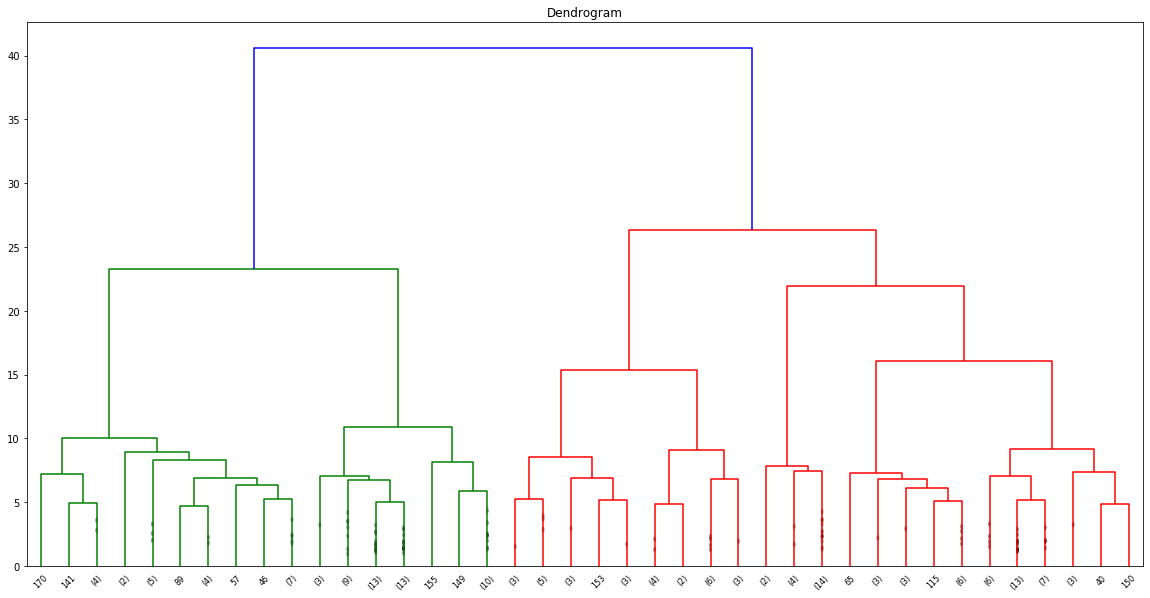

In [88]:
plt.figure(figsize=(20,10))
plt.title('Dendrogram')
dendo = shc.dendrogram(shc.linkage(cb_data_scaled[scal_cols], method='ward', metric = 'euclidean'),truncate_mode = 'lastp',p=40, show_contracted = True)

In [91]:
cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
groups = cluster.fit_predict(cb_data_scaled[scal_cols])
groups

array([2, 0, 3, 1, 4, 0, 0, 1, 1, 0, 0, 4, 4, 2, 2, 0, 3, 4, 0, 1, 2, 2,
       2, 2, 0, 3, 1, 3, 0, 1, 4, 0, 0, 1, 0, 2, 2, 1, 3, 1, 0, 4, 4, 3,
       1, 0, 3, 0, 1, 2, 3, 1, 2, 4, 1, 0, 1, 3, 4, 0, 0, 0, 3, 1, 1, 0,
       3, 0, 1, 0, 1, 3, 2, 2, 1, 4, 1, 4, 0, 0, 3, 1, 2, 1, 2, 2, 0, 3,
       1, 3, 0, 0, 3, 1, 0, 2, 2, 1, 1, 4, 0, 1, 0, 3, 1, 2, 2, 3, 1, 1,
       4, 2, 2, 2, 2, 0, 0, 1, 2, 4, 0, 0, 1, 0, 0, 1, 2, 0, 0, 3, 4, 1,
       4, 0, 1, 2, 4, 1, 1, 4, 0, 3, 1, 3, 1, 4, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 1, 3, 1, 0, 1, 0, 1, 1, 2, 2, 4, 0, 3, 1, 1, 3, 1])

In [92]:
groupsdf = pd.DataFrame(groups, columns=['groups'])

In [97]:
cb_data_copy = cb_data_cluster_att_2
cb_data_grp_copy = pd.concat([cb_data_copy,groupsdf],axis=1)

In [117]:
cb_data_grp_copy.loc[cb_data_grp_copy['groups']==3]

,index,player_name,team,att_LF_pref,att_LC_pref,att_RC_pref,att_RF_pref,att_LF_off,att_LC_off,att_RC_off,att_RF_off,pos_CB,pos_LCB,pos_L_CB,pos_RCB,pos_R_CB,foot_left,foot_right,init_x,final_x,init_y,final_y,groups
4,11,AhmedHegazi,West Brom,23.73,15.25,16.95,35.59,3.901891,7.576896,19.058473,3.556777,1,0,0,0,0,0,1,20.424850,39.390782,22.348697,22.348697,4
11,26,AndreasChristensen,Chelsea,15.99,19.73,13.95,31.97,3.505479,4.539223,7.901780,3.633077,1,0,0,0,0,0,1,24.801603,52.937876,26.573146,26.573146,4
12,30,AngeloOgbonna,West Ham,32.37,20.14,16.55,8.63,2.593756,4.054128,0.874742,4.553418,1,0,0,0,0,1,0,24.176353,39.807615,29.162325,29.162325,4
17,37,AshleyWilliams,Everton,13.51,5.41,29.73,32.43,3.365793,5.760370,3.136961,2.935298,1,0,0,0,0,0,1,23.967936,40.641283,24.256513,24.256513,4
30,75,ChristianKabasele,Watford,31.82,22.73,11.36,13.64,6.221438,5.035012,7.378027,-0.570814,1,0,0,0,0,0,1,20.424850,42.308617,20.032064,20.032064,4
41,101,DavidLuiz,Chelsea,27.05,19.67,15.57,24.59,4.270302,9.645099,10.123915,5.023086,1,0,0,0,0,0,1,23.551102,39.182365,23.302605,23.302605,4
42,102,DavinsonSanchez,Spurs,19.35,18.28,18.28,23.66,1.687073,4.715131,3.945855,3.528975,1,0,0,0,0,0,1,23.759519,37.723447,27.799599,27.799599,4
53,127,FedericoFernandez,Swansea,13.57,5.00,15.00,43.57,5.956083,7.211164,8.363992,3.621078,1,0,0,0,0,0,1,20.841683,38.140281,19.623246,19.623246,4
58,140,GaryCahill,Chelsea,12.31,18.46,18.46,32.31,2.698827,6.891289,6.160417,1.894294,1,0,0,0,0,0,1,24.593186,38.557114,25.074148,25.074148,4
75,183,JohnStones,Man City,20.83,25.00,16.67,29.17,2.183654,5.746202,6.159871,1.153069,1,0,0,0,0,0,1,27.094188,61.066132,24.392786,24.392786,4
